In [988]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
     
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [989]:
#Loading the dataset
df=pd.read_csv("training_set.csv")
dt=pd.read_csv("testing_set.csv")

In [990]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [991]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [992]:
df.isna().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Gender               15
Dependents           15
Loan_Amount_Term     14
Married               3
ApplicantIncome       2
Education             1
CoapplicantIncome     1
Loan_ID               0
property_Area         0
Loan_Status           0
dtype: int64

In [993]:
dt.isna().sum().sort_values(ascending = False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
property_Area         0
dtype: int64

In [994]:
df=df.drop(columns='Loan_ID')
dt=dt.drop(columns='Loan_ID')

<Axes: >

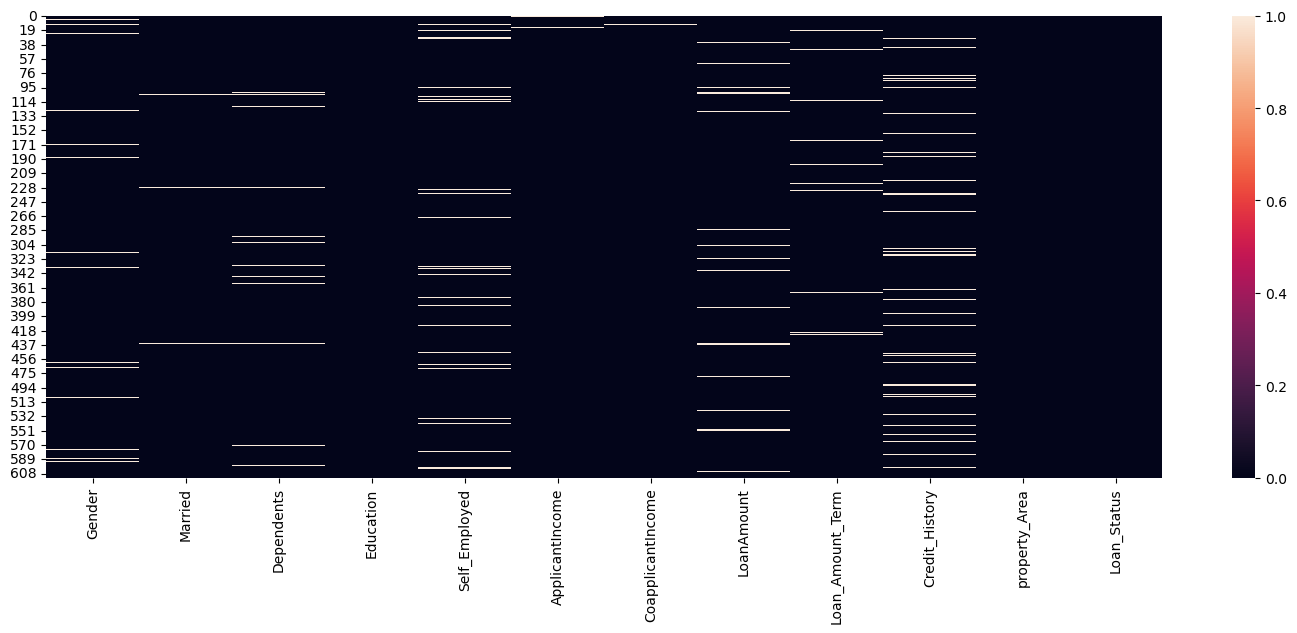

In [995]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(df.isnull(),cbar=True) 

<Axes: >

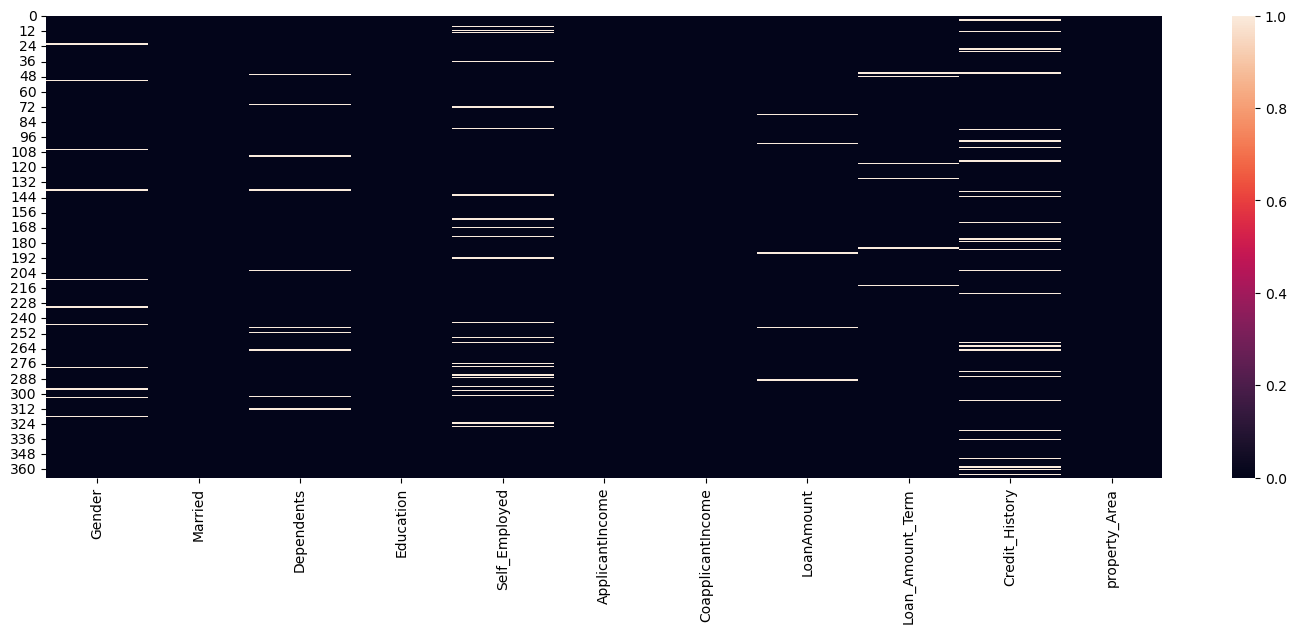

In [996]:
# Visualizing the missing values
fig = plt.figure(figsize=(18, 6))
sns.heatmap(dt.isnull(),cbar=True) 

In [997]:
app_inc = df.groupby(['Loan_Status'])['ApplicantIncome'].mean().reset_index()
app_inc

,Loan_Status,ApplicantIncome
0,N,5450.596859
1,Y,5385.099762


In [998]:
app_inc = df.groupby(['Loan_Status'])['CoapplicantIncome'].mean().reset_index()
app_inc

,Loan_Status,CoapplicantIncome
0,N,1877.807292
1,Y,1503.719525


In [999]:
app_inc = df.groupby(['Loan_Status'])['LoanAmount'].mean().reset_index()
app_inc

,Loan_Status,LoanAmount
0,N,151.220994
1,Y,144.294404


In [1000]:
app_inc = df.groupby(['Loan_Status'])['Loan_Amount_Term'].mean().reset_index()
app_inc

,Loan_Status,Loan_Amount_Term
0,N,344.064516
1,Y,341.072464


In [1001]:
categorical_data=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                       'property_Area','Loan_Status']
categorical_data_dt=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                       'property_Area']

In [1002]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\1529710697.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


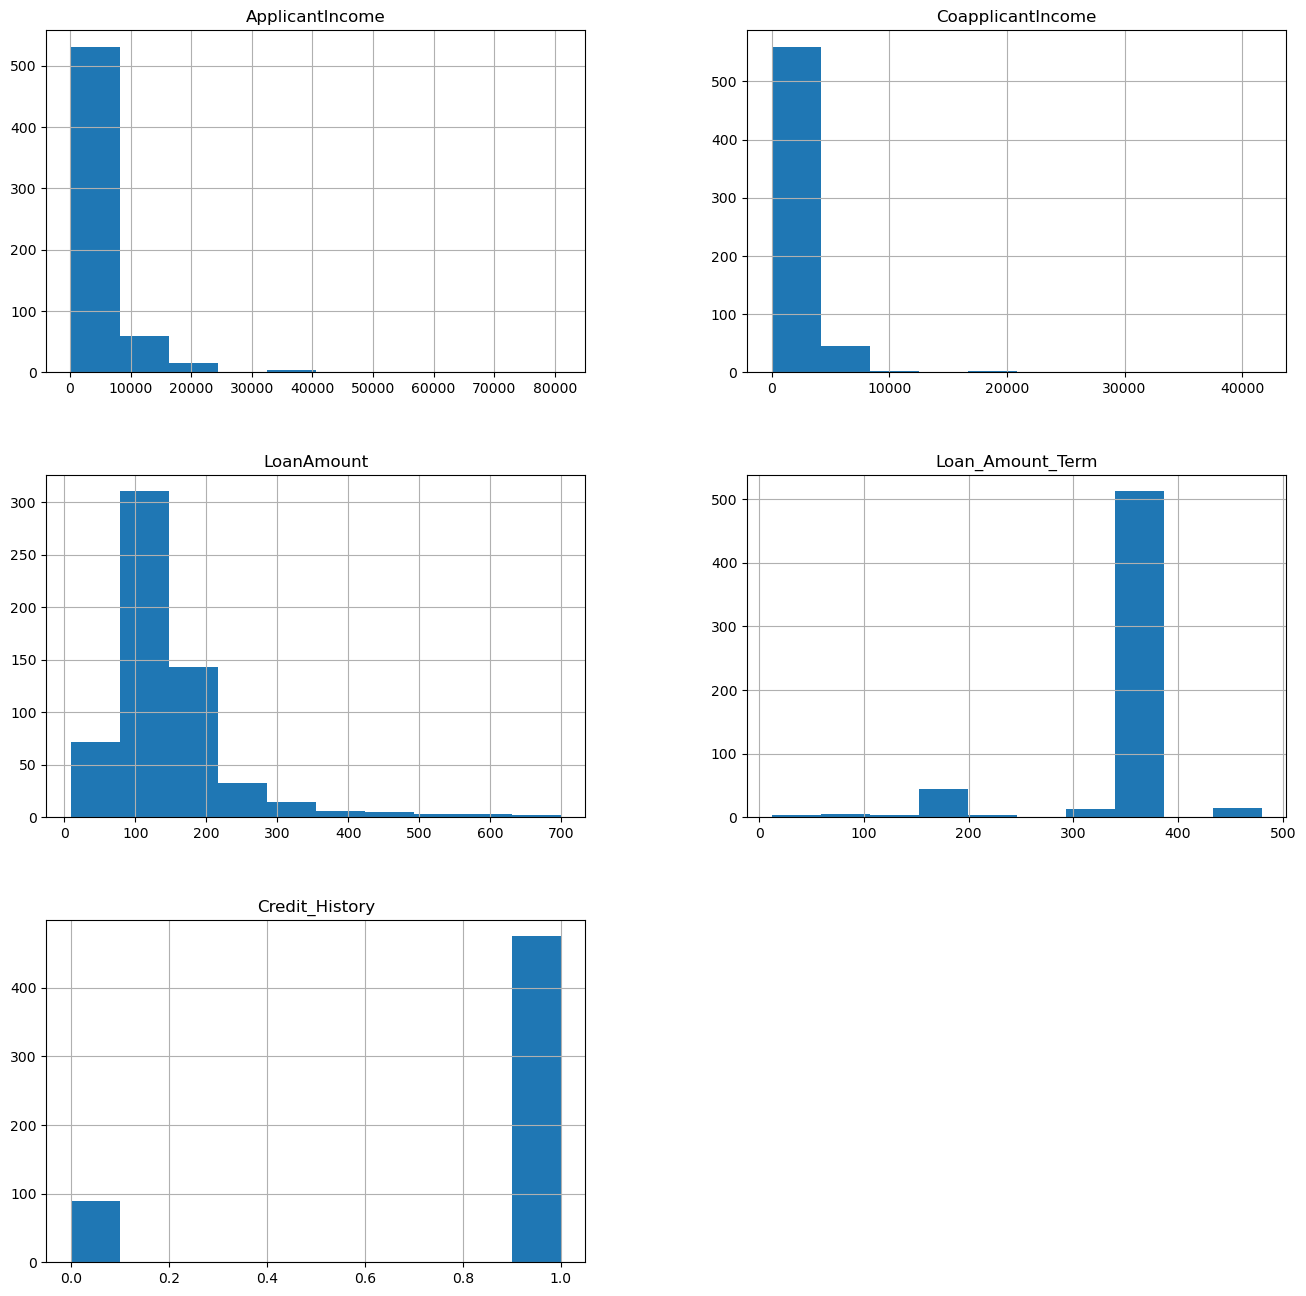

In [1003]:
# Chart - 1 visualization code
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

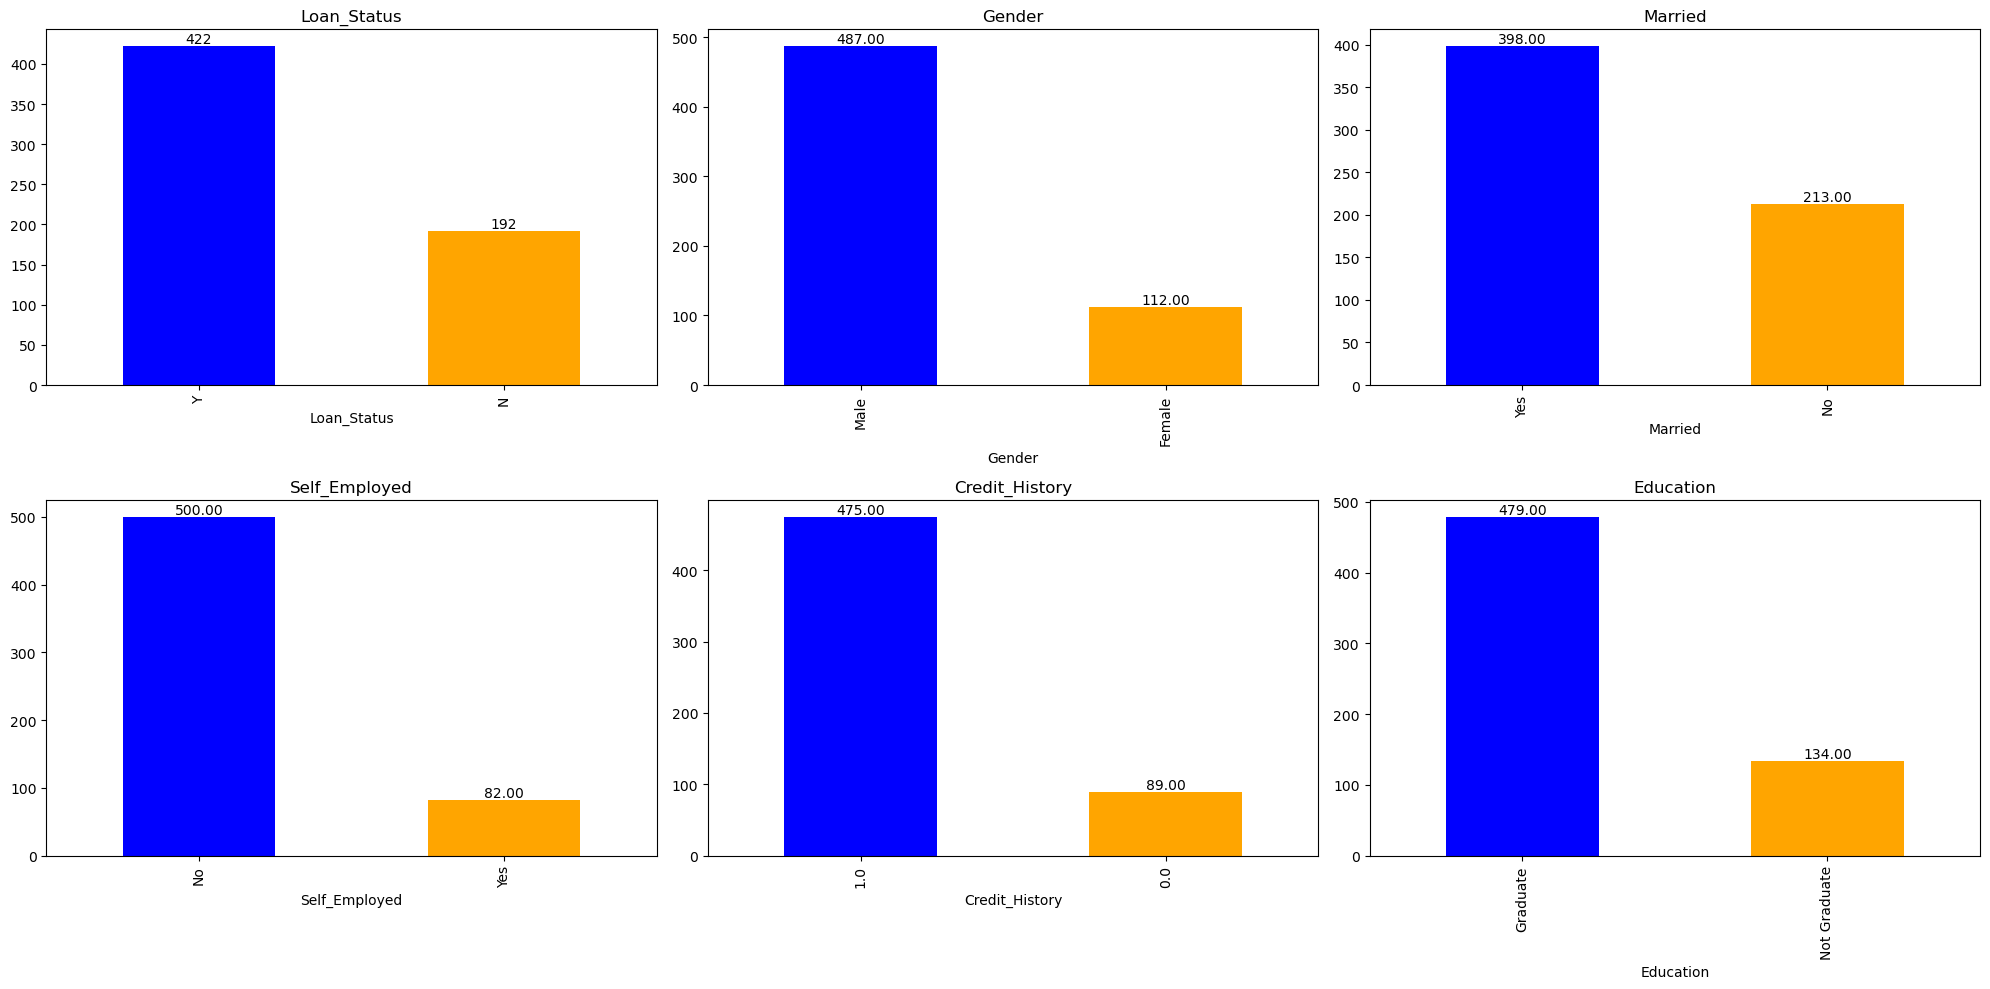

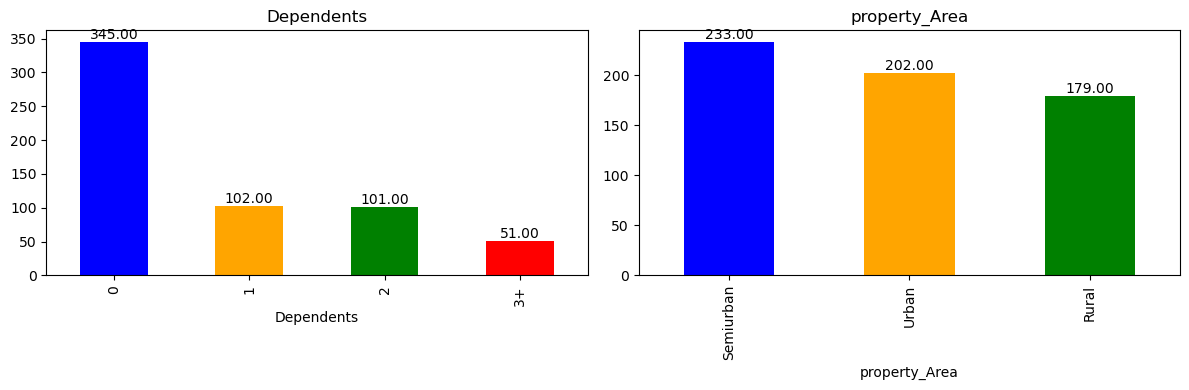

In [1004]:
import matplotlib.pyplot as plt

colors = ['blue', 'orange', 'green', 'red']

# First figure with 6 subplots
fig1, axs1 = plt.subplots(2, 3, figsize=(20, 10))

# Plot 1: Loan_Status
ax = axs1[0, 0]
df['Loan_Status'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Loan_Status')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 2: Gender
ax = axs1[0, 1]
df['Gender'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Gender')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 3: Married
ax = axs1[0, 2]
df['Married'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Married')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 4: Self_Employed
ax = axs1[1, 0]
df['Self_Employed'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Self_Employed')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 5: Credit_History
ax = axs1[1, 1]
df['Credit_History'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Credit_History')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 6: Education
ax = axs1[1, 2]
df['Education'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Education')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Second figure with 2 subplots
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 4))

# Plot 7: Dependents
ax = axs2[0]
df['Dependents'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('Dependents')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Plot 8: property_Area
ax = axs2[1]
df['property_Area'].value_counts().plot.bar(ax=ax, color=colors)
ax.set_title('property_Area')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [1005]:
categorical_data = [i for i in df.columns if df[i].nunique()<=4]
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'property_Area',
 'Loan_Status']

In [1006]:
numerical_data = [i for i in df.columns if i not in categorical_data]
numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\3410482128.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[col]))
C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\3410482128.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[col]))
C:\Users\Richa\AppData\Local\Temp\ipykernel_3480

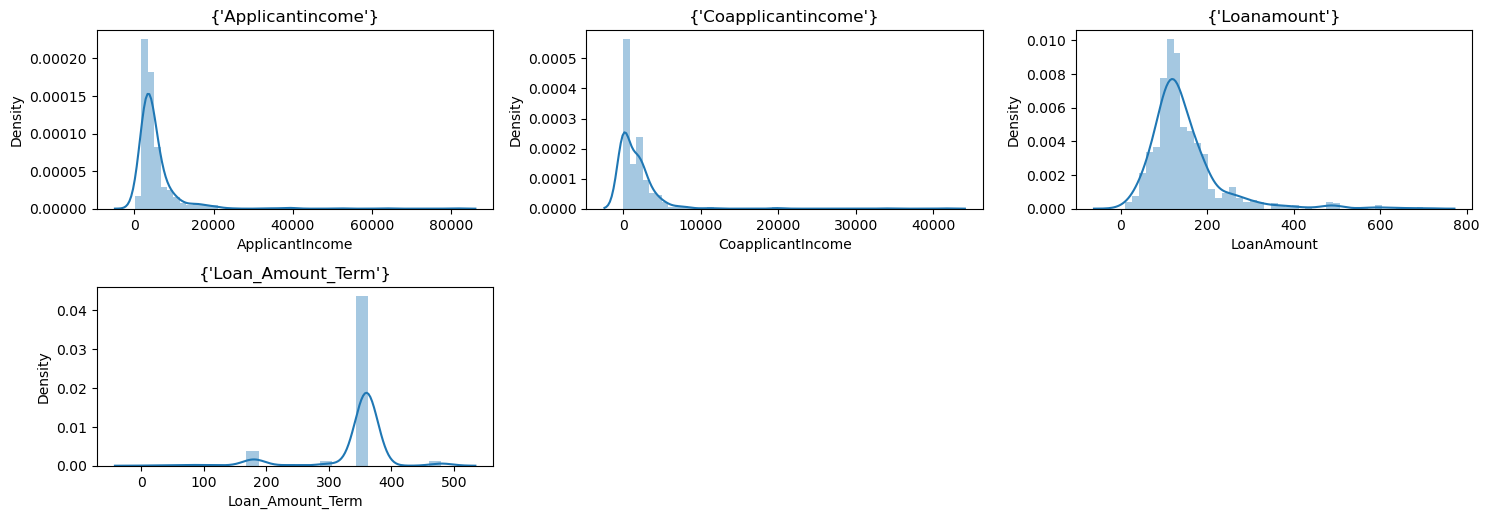

In [1007]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
for n, col in enumerate(numerical_data[:]):
  plt.subplot(4,3, n+1)
  sns.distplot((df[col]))
  plt.title({col.title()})
  plt.tight_layout()

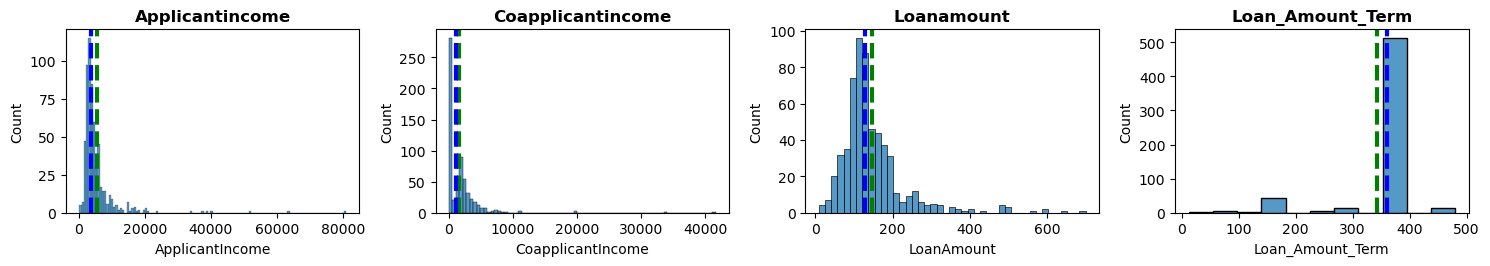

In [1008]:
# Chart - 3 visualization code
# we will visulize the mean and median
plt.figure(figsize=(15,12))
for n,column in enumerate(numerical_data):
  features_var = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(features_var)
  ax.axvline(features_var.mean(), color='green', linestyle='dashed', linewidth=3)
  ax.axvline(features_var.median(), color='blue', linestyle='dashed', linewidth=3)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

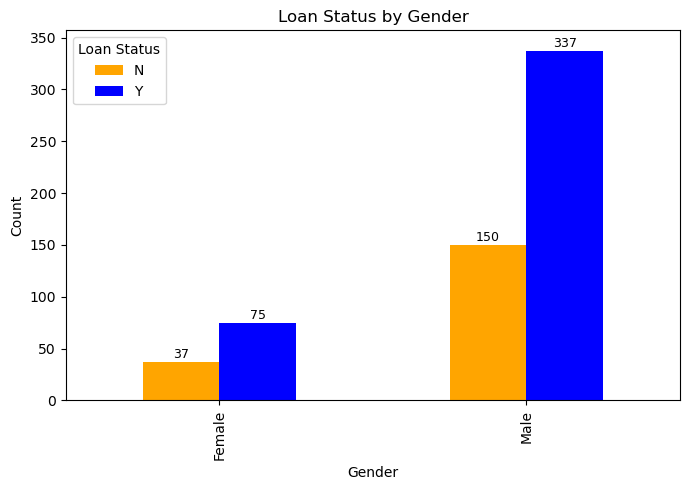

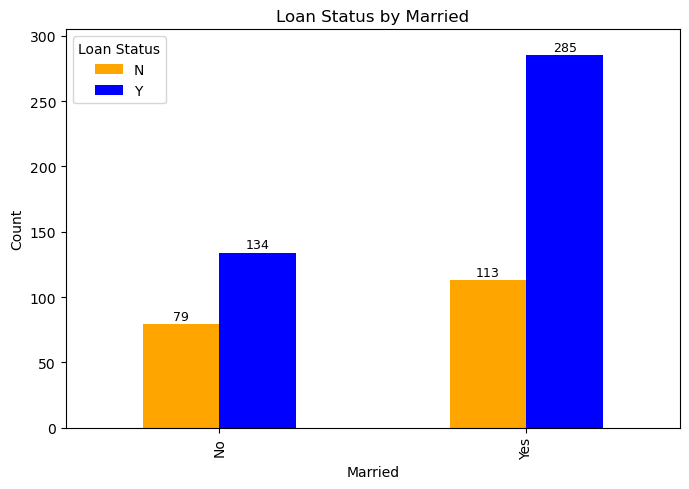

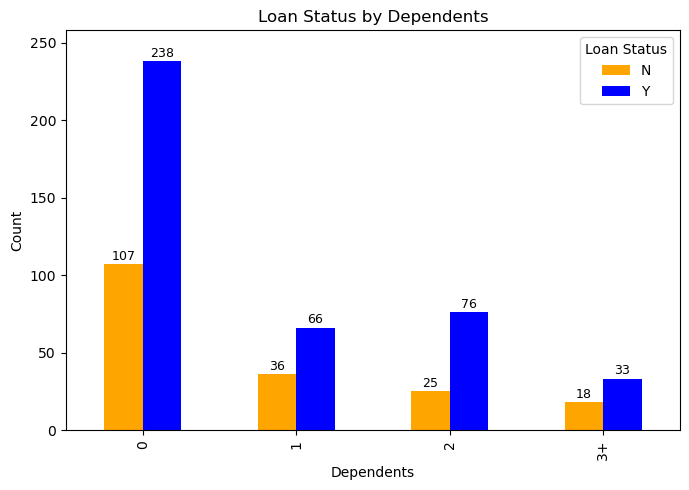

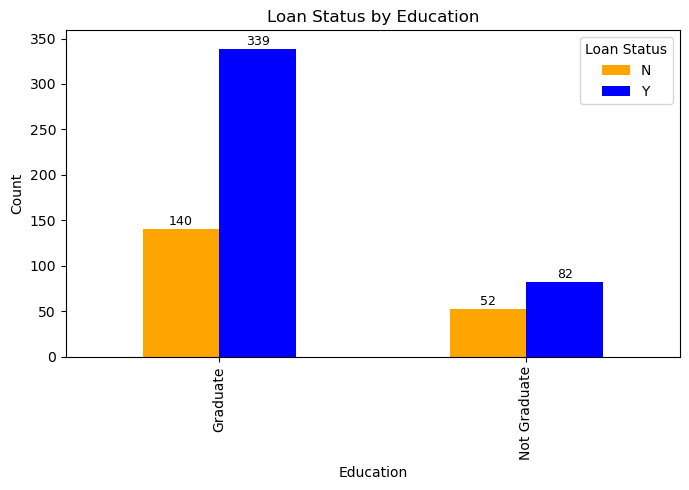

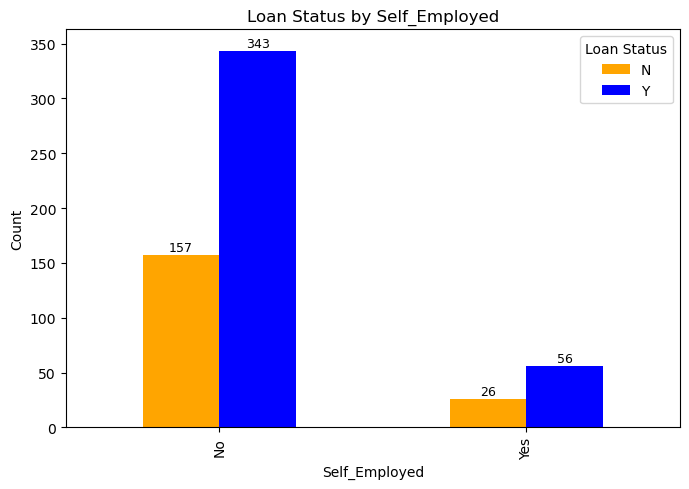

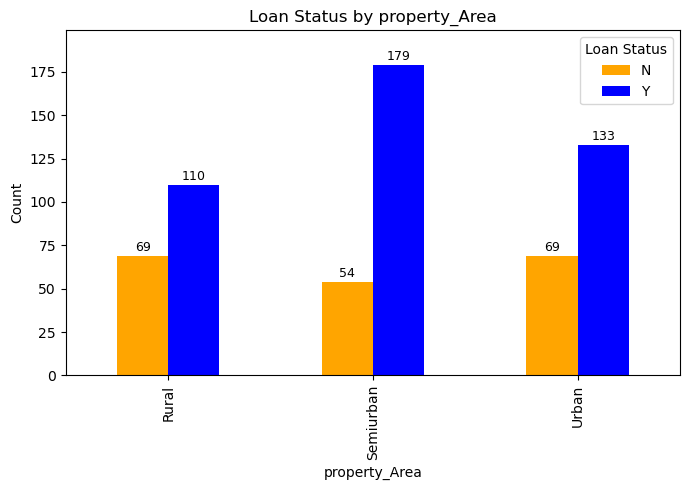

In [1009]:
import pandas as pd
import matplotlib.pyplot as plt

cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area']

for col in cat_features:
    cross_tab = pd.crosstab(df[col], df['Loan_Status'])

    # Plot side-by-side bars (not stacked)
    ax = cross_tab.plot(kind='bar', stacked=False, figsize=(7, 5), color=['orange', 'blue'])

    plt.title(f'Loan Status by {col}')
    plt.ylabel('Count')
    plt.ylim(0, cross_tab.values.max() + 20)  # dynamic headroom

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2., 
                height + 1, 
                f'{int(height)}', 
                ha='center', va='bottom', fontsize=9
            )

    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()


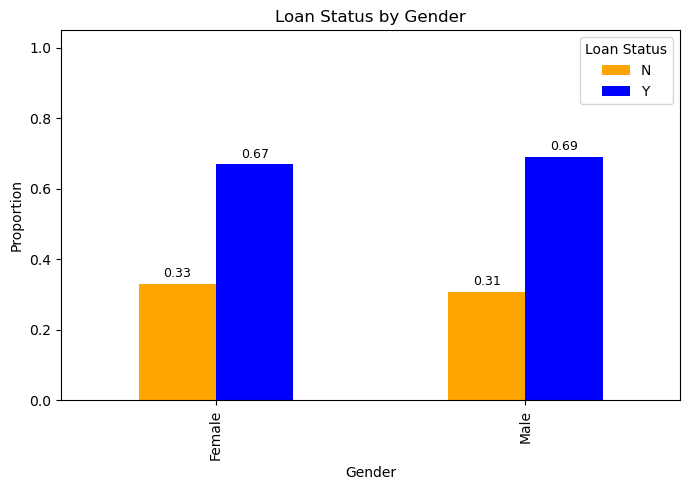

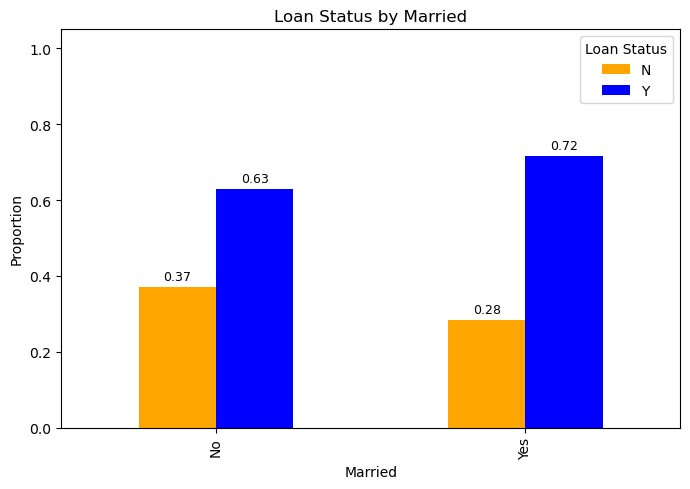

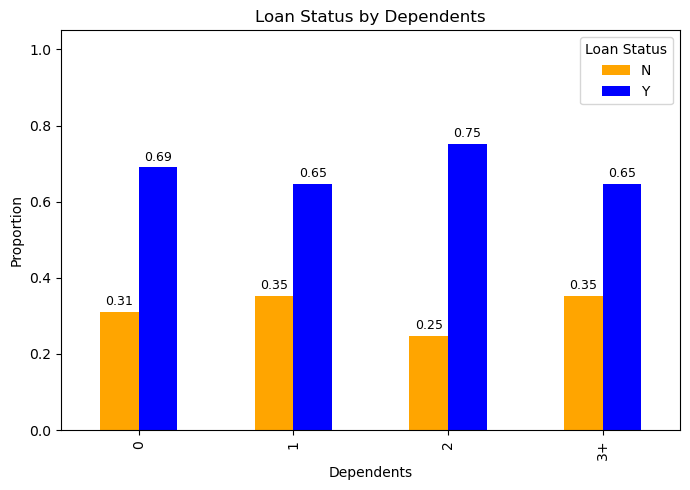

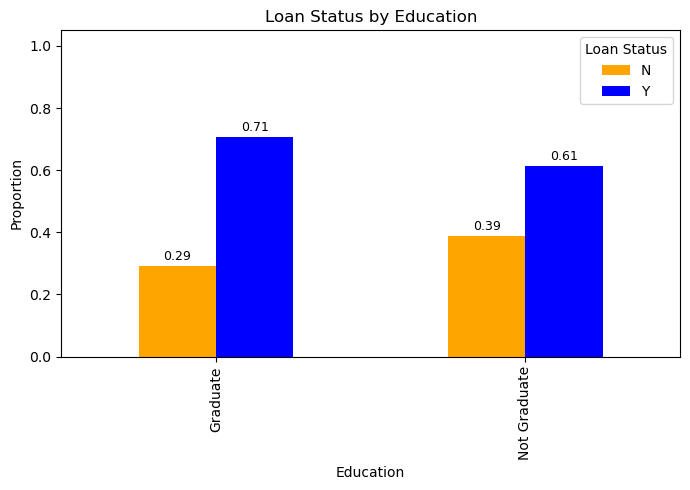

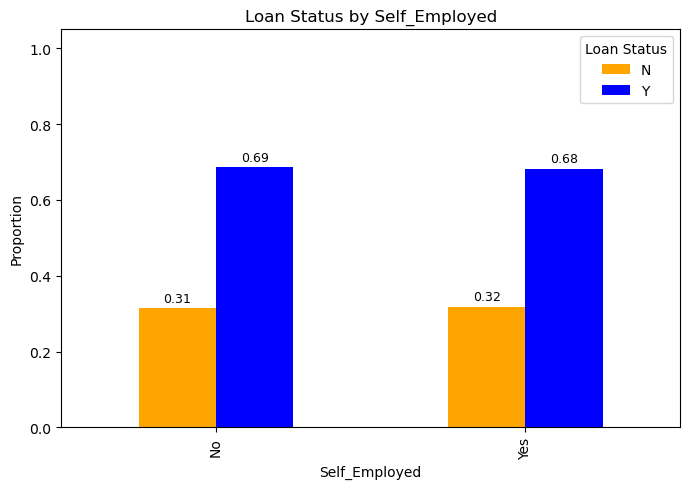

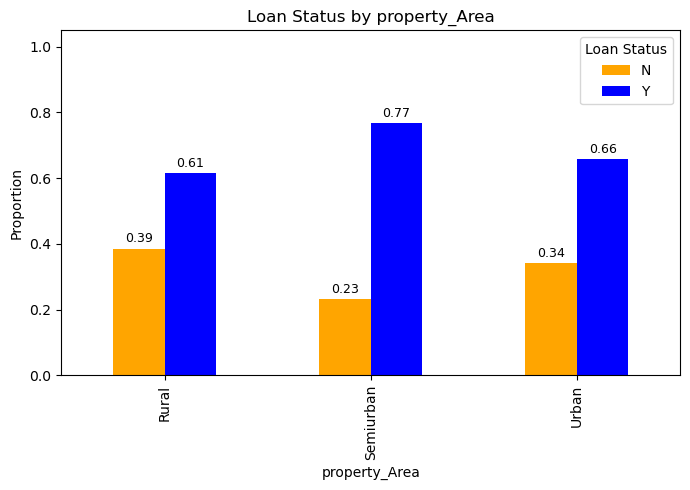

In [1010]:
import pandas as pd
import matplotlib.pyplot as plt

cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area']

for col in cat_features:
    cross_tab = pd.crosstab(df[col], df['Loan_Status'],normalize='index')

    # Plot side-by-side bars (not stacked)
    ax = cross_tab.plot(kind='bar', stacked=False, figsize=(7, 5), color=['orange', 'blue'])

    plt.title(f'Loan Status by {col}')
    plt.ylabel('Proportion')
    plt.ylim(0, 1.05)  # add a little headroom for labels

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # avoid labeling bars with 0 height
            ax.text(
                p.get_x() + p.get_width() / 2., 
                height + 0.01, 
                f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9
            )

    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()

In [1011]:
for col in categorical_data:
    df[col] = df[col].astype('category').cat.codes
df.replace(-1, np.nan, inplace=True)
for col in categorical_data_dt:
    dt[col] = dt[col].astype('category').cat.codes
dt.replace(-1, np.nan, inplace=True)

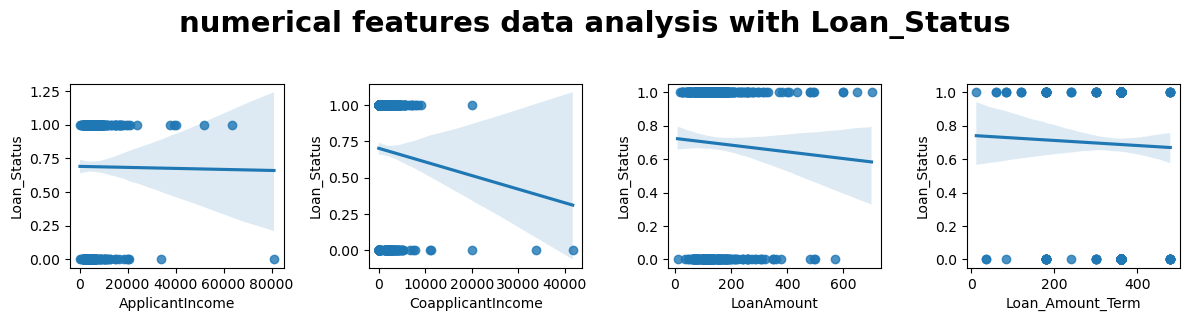

In [1012]:
#Bivariate analysis of num cols with Loan_Status
plt.figure(figsize=(12,5))

plt.suptitle('numerical features data analysis with Loan_Status', fontsize=21, fontweight='bold', y=1.03)

for i,col in enumerate(numerical_data):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=df[col], y='Loan_Status', data=df)
  
  plt.xlabel(col)
  plt.tight_layout()

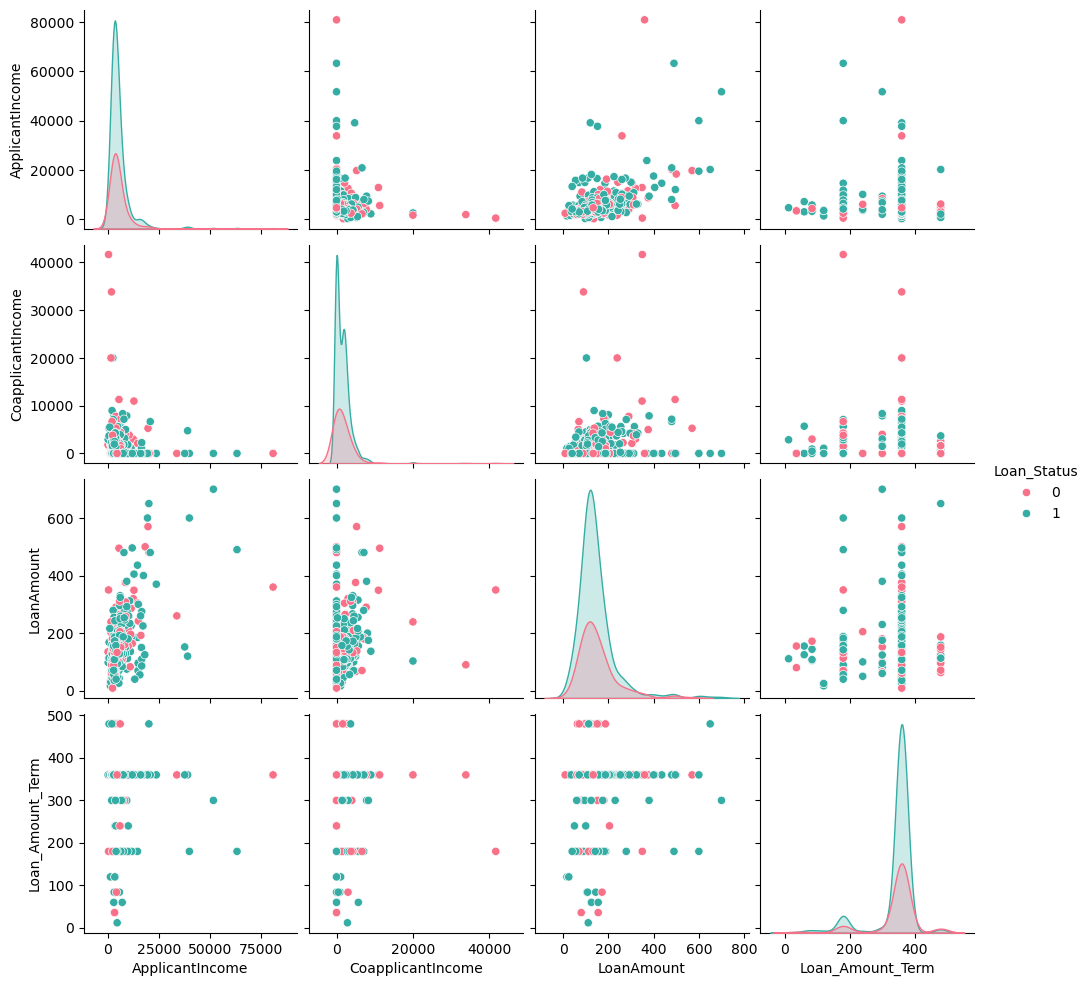

In [1013]:
#Pair Plot
sns.pairplot(df[numerical_data + ['Loan_Status']], hue='Loan_Status', palette='husl')
plt.show()

<Axes: >

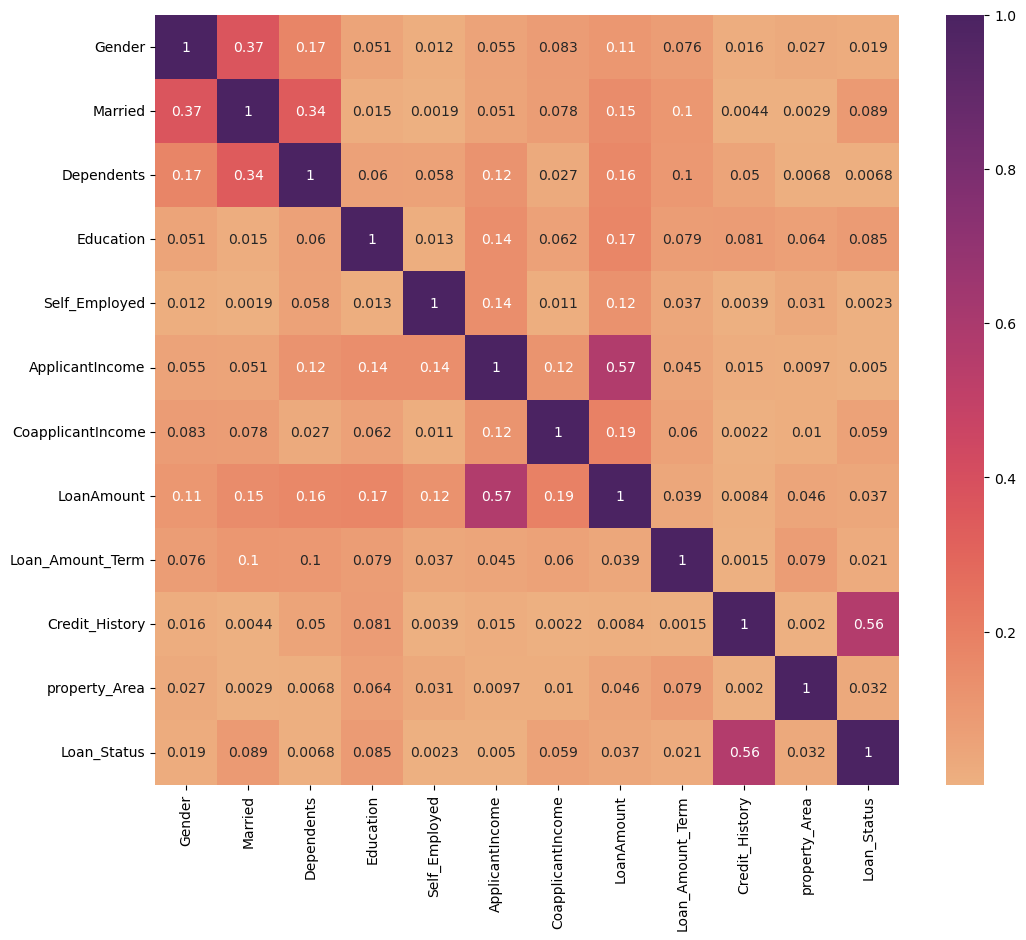

In [1014]:
#corr
plt.figure(figsize = (12,10))
corr = df.corr()
sns.heatmap(abs(corr), annot=True, cmap = 'flare')

In [1015]:
df.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [1016]:
dt.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [1017]:
#Filling the null values
for col in categorical_data:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in categorical_data_dt:
    dt[col].fillna(dt[col].mode()[0], inplace=True)



C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\1841892692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\1841892692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [1018]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
property_Area         0
Loan_Status           0
dtype: int64

In [1019]:
dt.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [1020]:
for col in numerical_data:
    df[col].fillna(df[col].median(), inplace=True)
for col in numerical_data:
    dt[col].fillna(dt[col].median(), inplace=True)
    dt['Credit_History'].fillna(dt['Credit_History'].mode()[0], inplace=True)
dt.isna().sum()

C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\569374393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Richa\AppData\Local\Temp\ipykernel_34804\569374393.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64

In [1021]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [1022]:
dt.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64

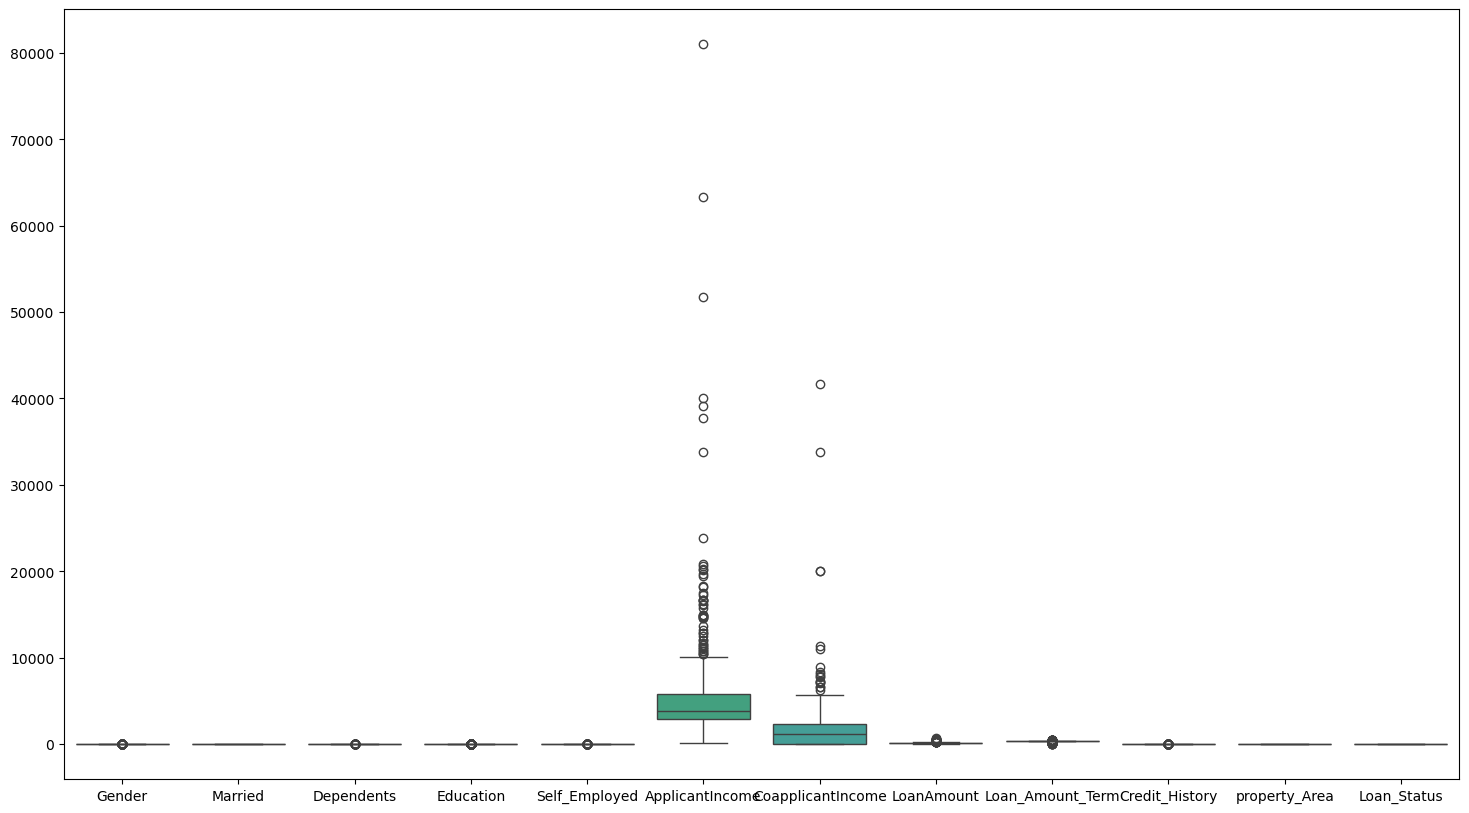

In [1023]:

plt.figure(figsize=(18,10))
# boxplot of the data features
sns.boxplot(data=df)
plt.show() 

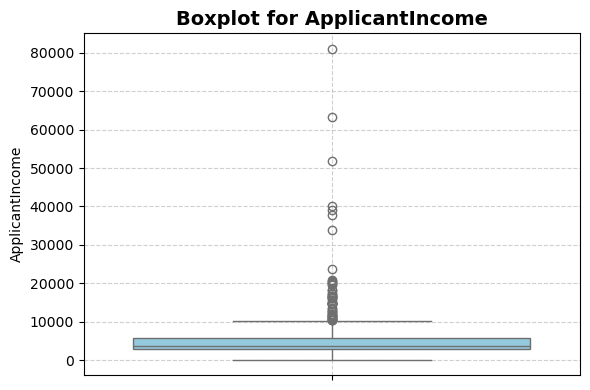

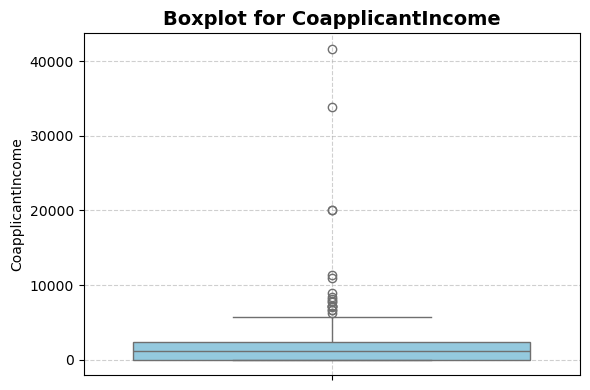

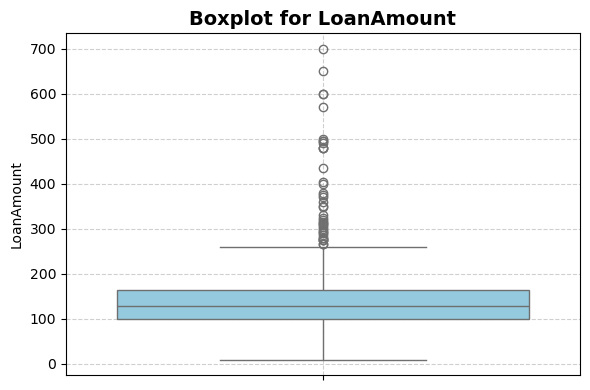

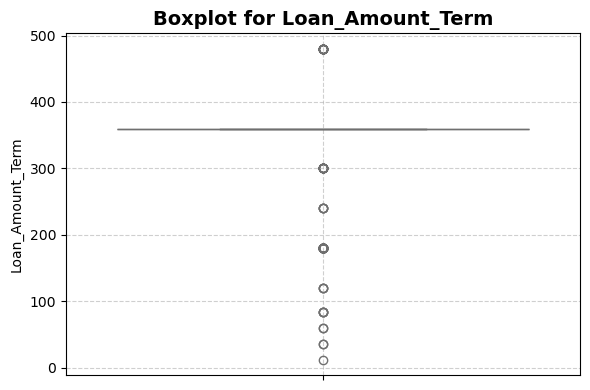

In [1024]:
for col in numerical_data:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [1025]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def removal_outliers(df, column):
#     plt.figure(figsize=(12, 6))

#     # Plot before removing outliers
#     plt.subplot(1, 2, 1)
#     plt.title(f'Outliers Before - {column}')
#     sns.boxplot(y=df[column], color='skyblue')

#     # Remove outliers using Z-score
#     z_scores = (df[column] - df[column].mean()) / df[column].std()
#     df_clean = df[z_scores.abs() < 3]

#     # Plot after removing outliers
#     plt.subplot(1, 2, 2)
#     plt.title(f'Outliers After - {column}')
#     sns.boxplot(y=df_clean[column], color='lightgreen')

#     plt.tight_layout()
#     plt.show()

#     return df_clean


In [1026]:
# for columns in numerical_data:
#   removal_outliers(df,columns)

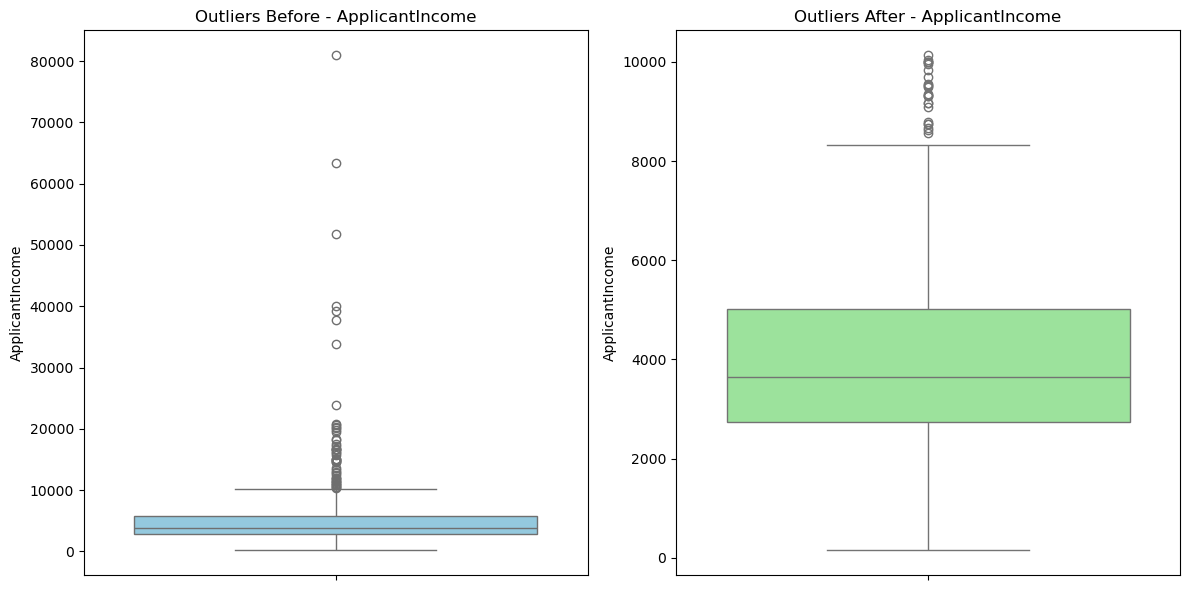

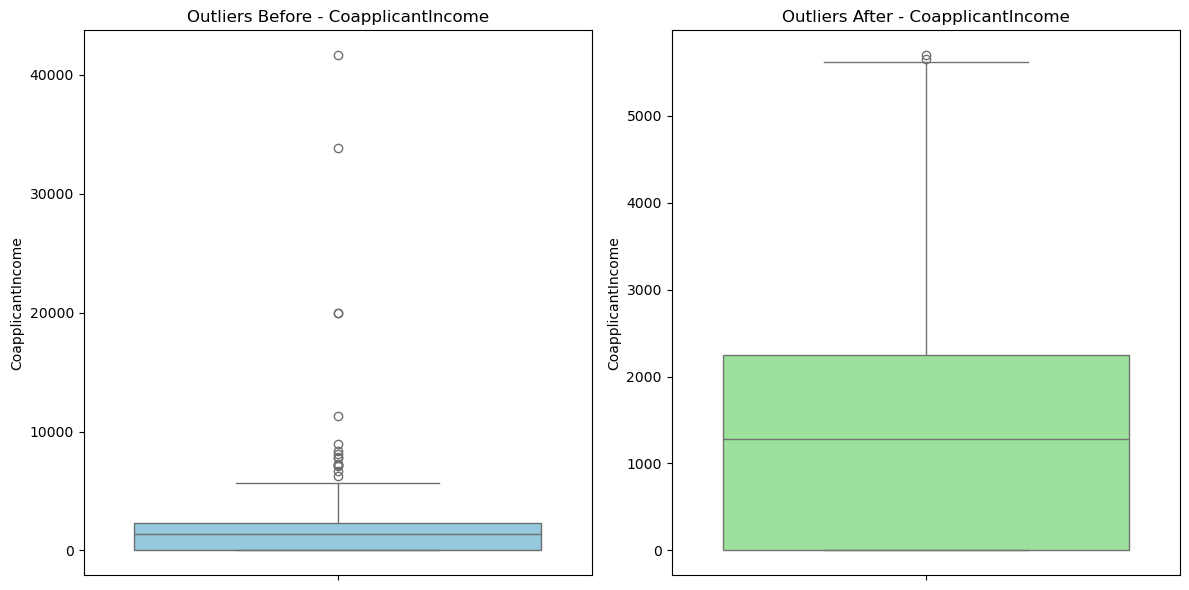

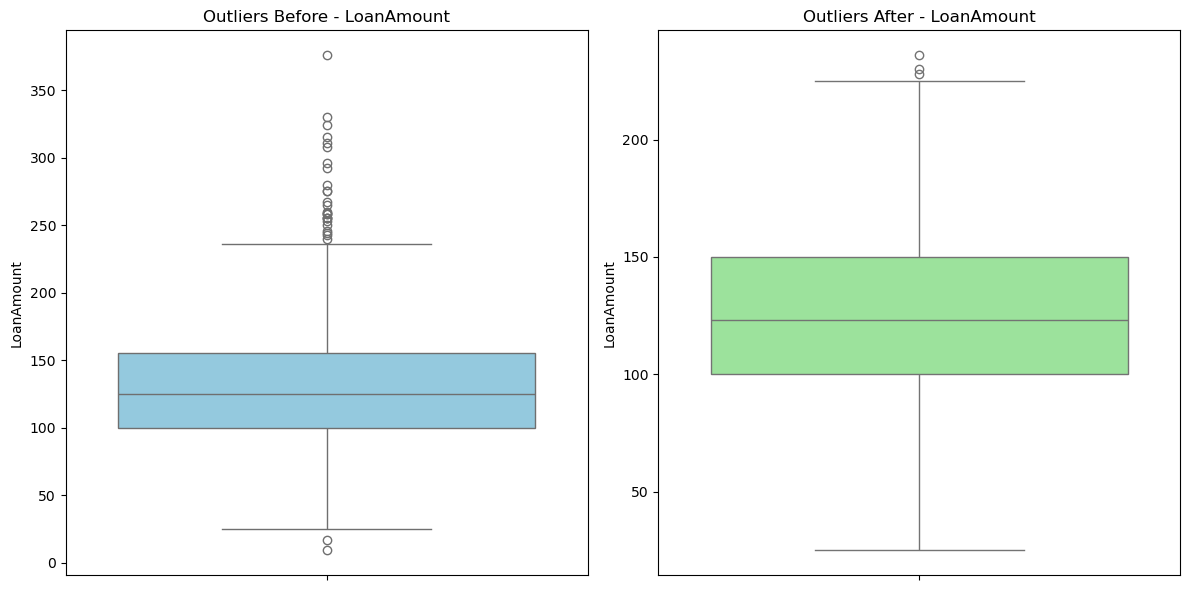

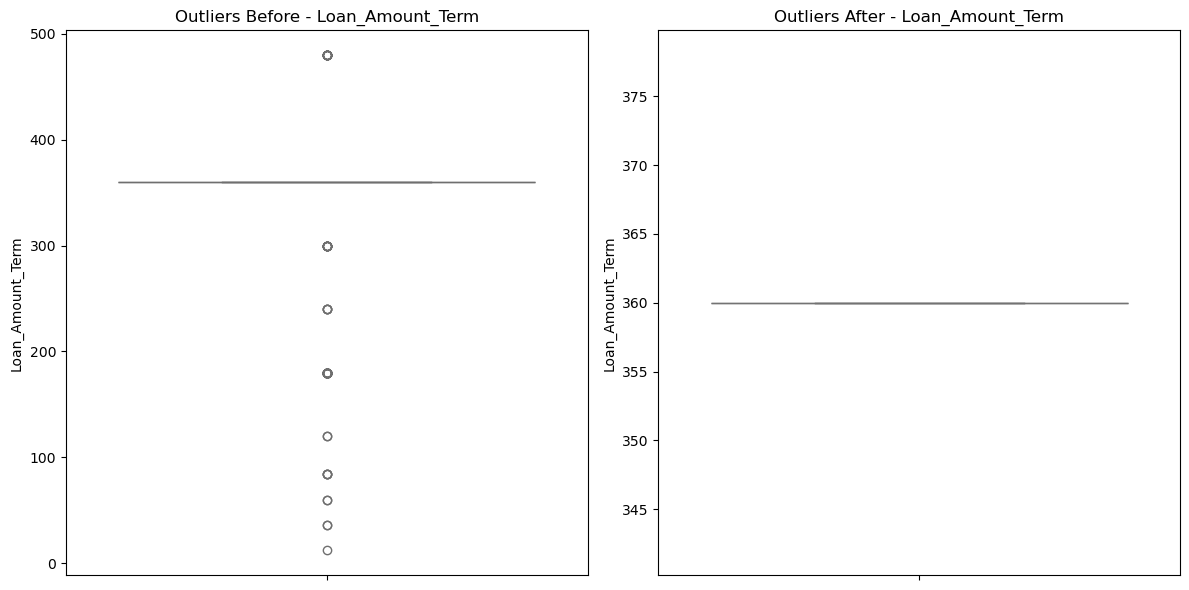

In [1027]:
def removal_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Plot before and after
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title(f'Outliers Before - {column}')
    sns.boxplot(y=df[column], color='skyblue')

    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]

    plt.subplot(1, 2, 2)
    plt.title(f'Outliers After - {column}')
    sns.boxplot(y=df_clean[column], color='lightgreen')

    plt.tight_layout()
    plt.show()

    return df_clean

# Use it like:
for col in numerical_data:
    df = removal_outliers_iqr(df, col)


In [1028]:
#Outlier Handling on Test data
def removal_outliers_iqr(dt, column):
    Q1 = dt[column].quantile(0.25)
    Q3 = dt[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dt_clean = dt[(dt[column] >= lower) & (dt[column] <= upper)]
    return dt_clean

# Usage:
for col in numerical_data:
    dt = removal_outliers_iqr(dt, col)


In [1029]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1


In [1030]:
# For training set
df['property_Area_str'] = df['property_Area'].map({0: 'Urban', 1: 'Rural', 2: 'Semiurban'})
df['Gender_str'] = df['Gender'].map({1.0: 'Male', 0.0: 'Female'})

# One-hot encode the string versions, keep original, and convert True/False to int
df_ohe = pd.get_dummies(df[['property_Area_str', 'Gender_str']], prefix=['property_Area', 'Gender'])
df_ohe = df_ohe.astype(int)  # Convert True/False to 1/0

# Join the one-hot encoded columns back
df = pd.concat([df, df_ohe], axis=1)

# For test set
dt['property_Area_str'] = dt['property_Area'].map({0: 'Urban', 1: 'Rural', 2: 'Semiurban'})
dt['Gender_str'] = dt['Gender'].map({1.0: 'Male', 0.0: 'Female'})

dt_ohe = pd.get_dummies(dt[['property_Area_str', 'Gender_str']], prefix=['property_Area', 'Gender'])
dt_ohe = dt_ohe.astype(int)

dt = pd.concat([dt, dt_ohe], axis=1)



In [1031]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,property_Area_str,Gender_str,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2,1,Semiurban,Male,0,1,0,0,1
1,1.0,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,Urban,Male,0,0,1,0,1
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2,1,Semiurban,Male,0,1,0,0,1
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1,Semiurban,Male,0,1,0,0,1
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1,Semiurban,Male,0,1,0,0,1


In [1032]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,property_Area_str,Gender_str,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,1.0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,2,Semiurban,Male,0,1,0,0,1
1,1.0,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,2,Semiurban,Male,0,1,0,0,1
2,1.0,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,2,Semiurban,Male,0,1,0,0,1
3,1.0,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,2,Semiurban,Male,0,1,0,0,1
4,1.0,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,2,Semiurban,Male,0,1,0,0,1


In [1033]:
df=df.drop(columns=["property_Area_str","Gender_str","property_Area","Gender"])
dt=dt.drop(columns=["property_Area_str","Gender_str","property_Area","Gender"])

In [1034]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,0,1
1,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,0,1
2,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,0,1
4,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,0,1


In [1035]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,0,1
1,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,0,1
2,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,0,1
4,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,0,1


In [1036]:
# plt.figure(figsize=(20,10))
# sns.heatmap(df.corr(),annot=True)

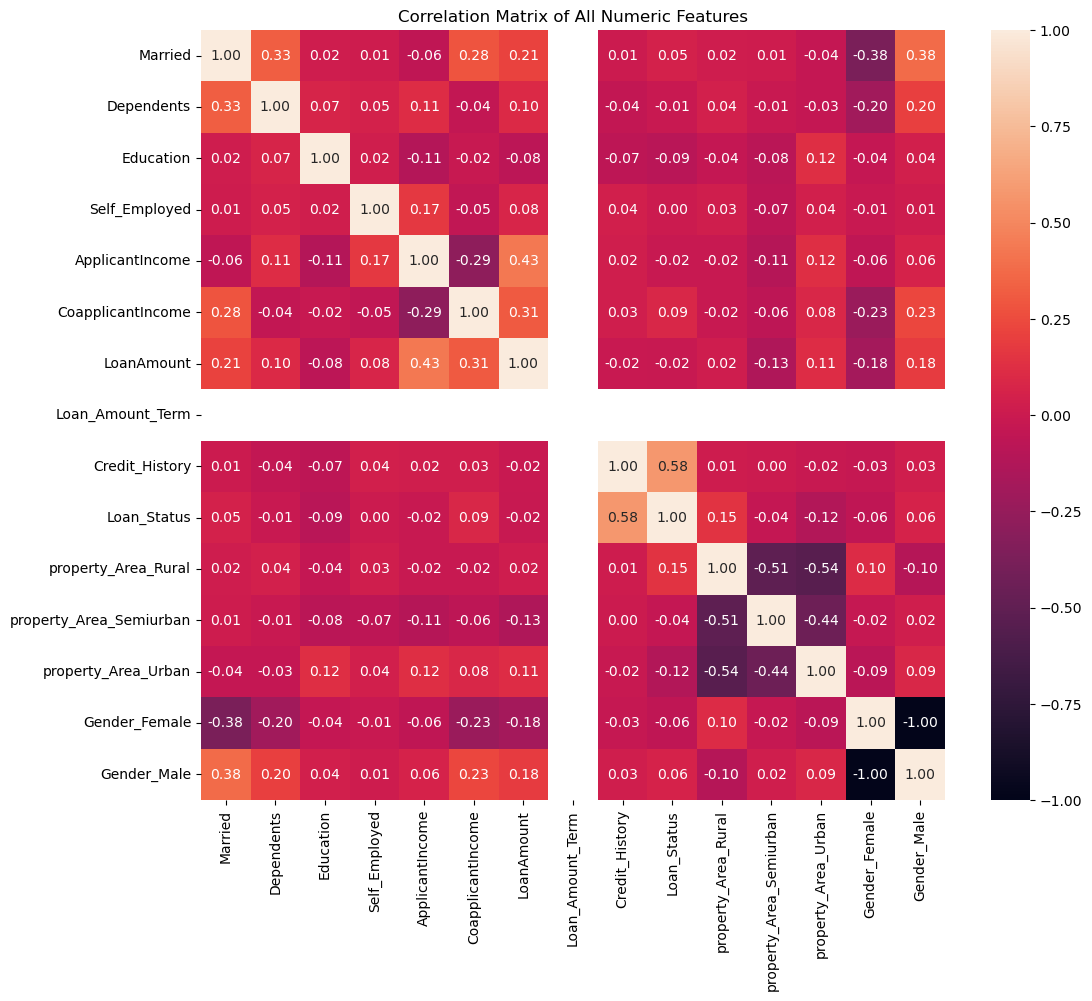

In [1037]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title("Correlation Matrix of All Numeric Features")
plt.show()

In [1038]:
loan_status_corr = corr_matrix['Loan_Status'].sort_values()

print("\n Correlation of all features with 'Loan_Status' (sorted):\n")
loan_status_corr


 Correlation of all features with 'Loan_Status' (sorted):



property_Area_Urban       -0.118804
Education                 -0.091172
Gender_Female             -0.058426
property_Area_Semiurban   -0.036153
LoanAmount                -0.018388
ApplicantIncome           -0.016651
Dependents                -0.008730
Self_Employed              0.001497
Married                    0.048452
Gender_Male                0.058426
CoapplicantIncome          0.085354
property_Area_Rural        0.147562
Credit_History             0.575827
Loan_Status                1.000000
Loan_Amount_Term                NaN
Name: Loan_Status, dtype: float64

In [1039]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def vif_calc(X):

#     # Now Calculate the VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif.sort_values(by = ['VIF'], ascending=False ))


In [1040]:
# vif_calc(df[[i for i in df.columns if i not in ["Loan_Status"]]])

In [1041]:
# vif_calc(df[[i for i in df.columns if i not in ["Loan_Status","property_Area_Semiurban"]]])

In [1042]:
# vif_calc(df[[i for i in df.columns if i not in ["Loan_Status","property_Area_Semiurban","Gender_Female"]]])

In [1043]:
# df=df.drop(columns=["property_Area_Semiurban","Gender_Female"])
# dt=dt.drop(columns=["property_Area_Semiurban","Gender_Female"])

In [1044]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,0,1
1,1.0,1.0,0.0,0.0,3806.0,1508.0,128.0,360.0,1.0,0,0,0,1,0,1
2,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,0,1
4,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,0,1


In [1045]:
dt.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Gender_Female,Gender_Male
0,1,0.0,0,0.0,5720,0,110.0,360.0,1.0,0,1,0,0,1
1,1,1.0,0,0.0,3076,1500,126.0,360.0,1.0,0,1,0,0,1
2,1,2.0,0,0.0,5000,1800,208.0,360.0,1.0,0,1,0,0,1
3,1,2.0,0,0.0,2340,2546,100.0,360.0,1.0,0,1,0,0,1
4,0,0.0,1,0.0,3276,0,78.0,360.0,1.0,0,1,0,0,1


In [1046]:
df.to_csv('train_preprocessed.csv', index=False)
dt.to_csv('test_preprocessed.csv', index=False)